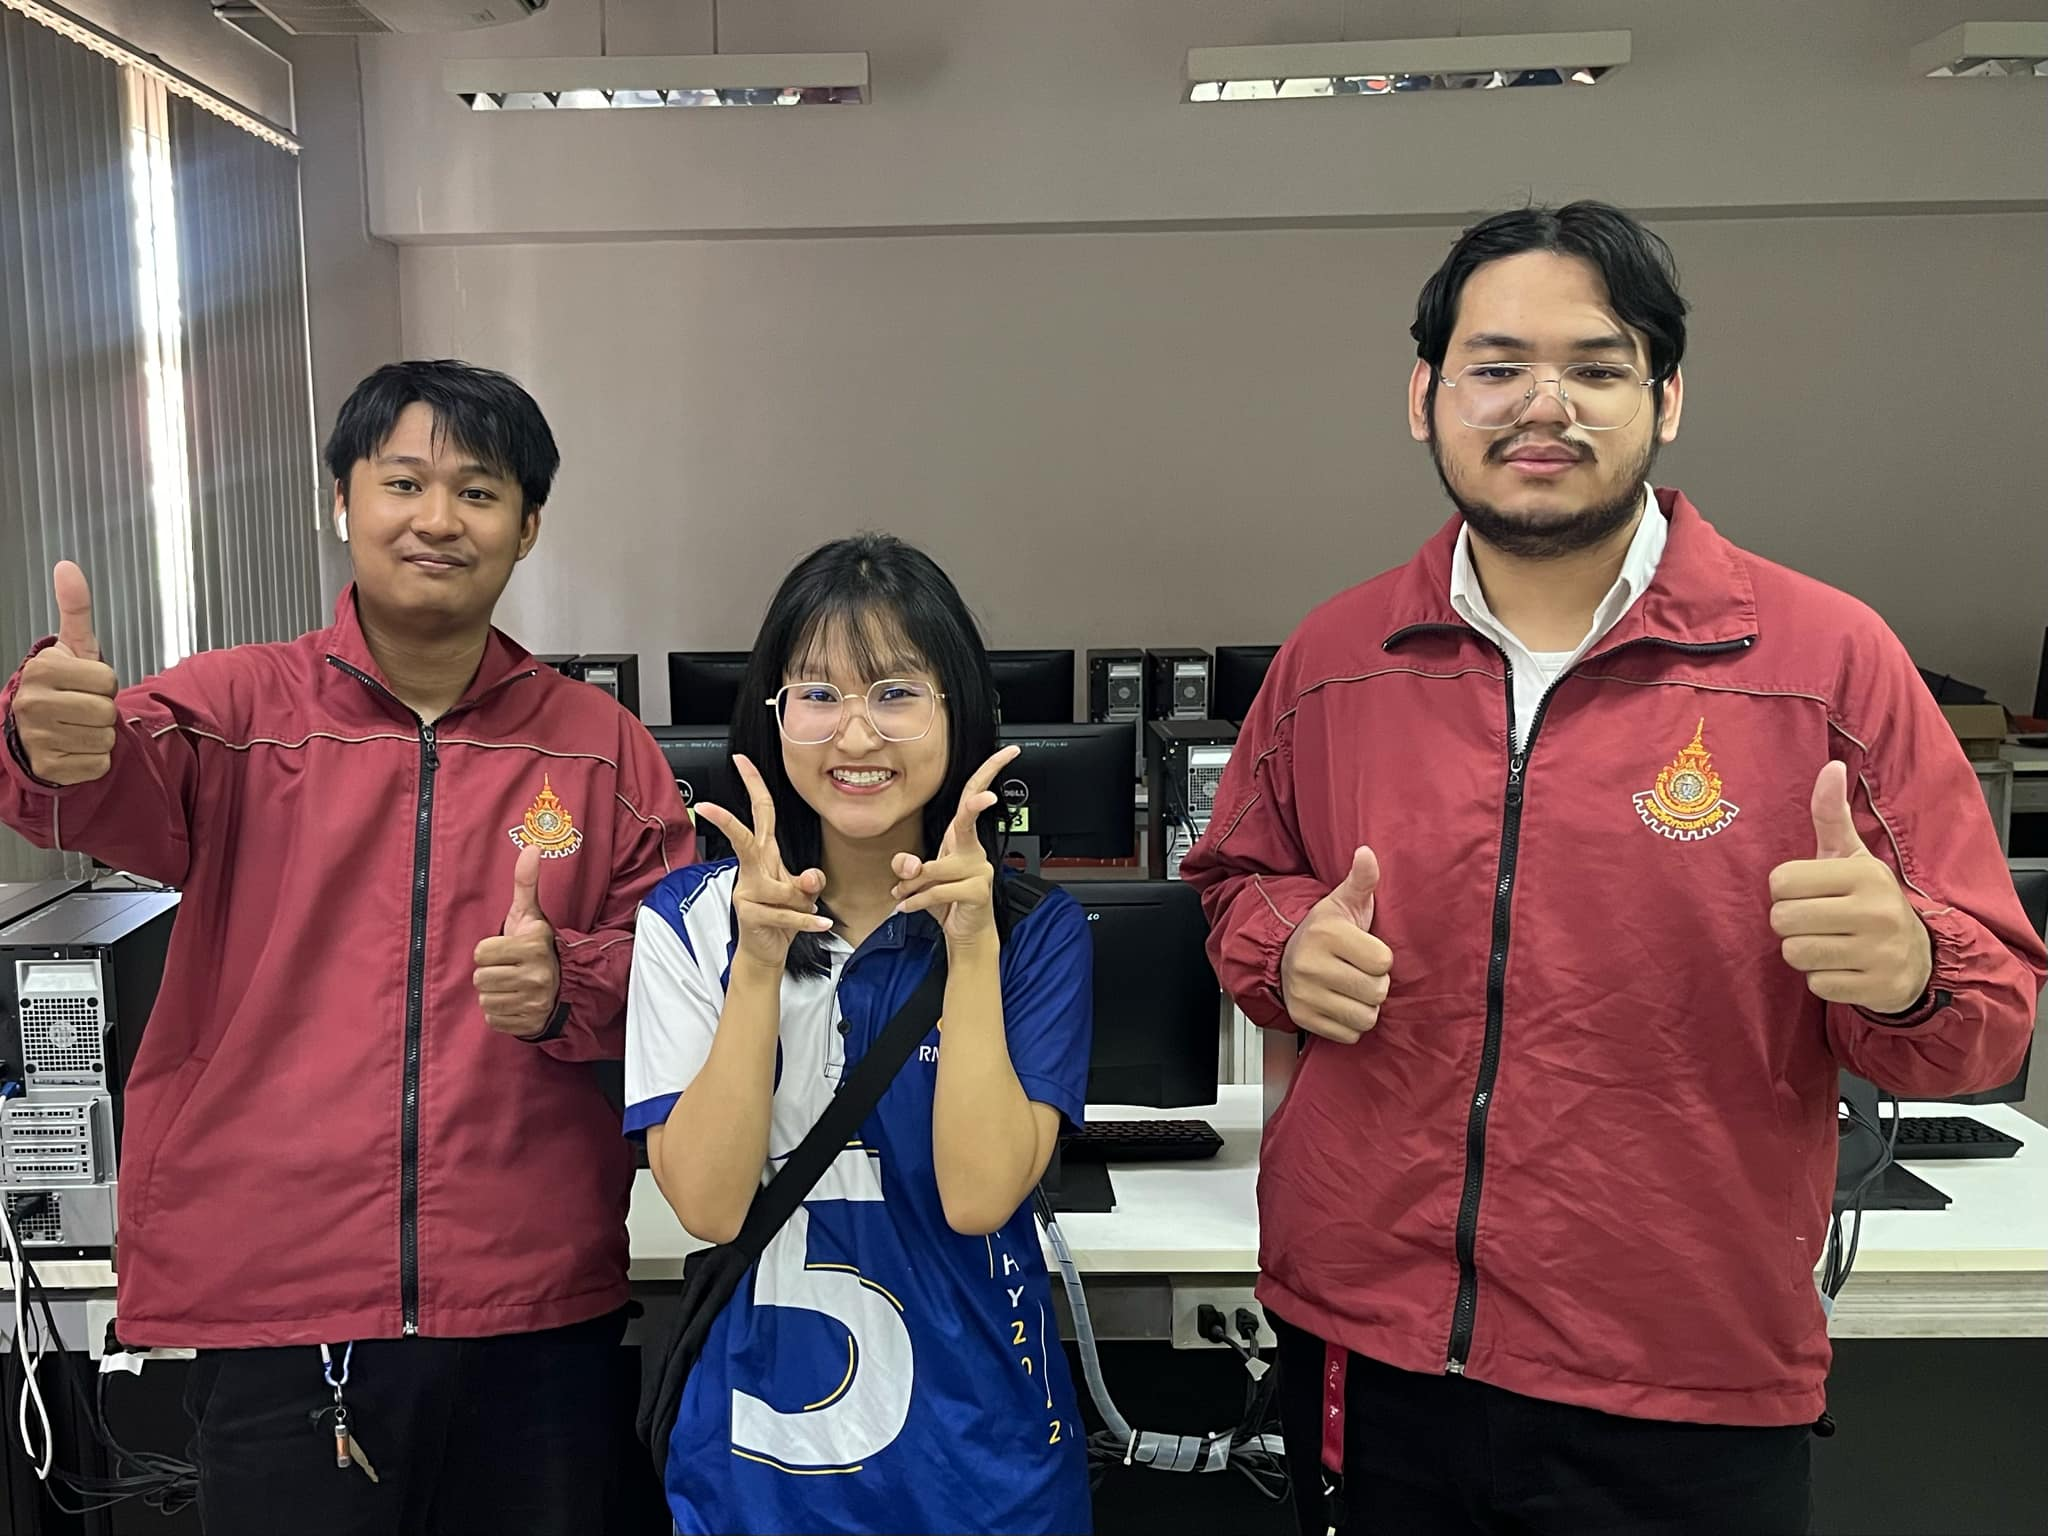

ชื่อกลุ่ม ราชาโจรสลัด

> ข้อมูลในการทำโครงงาน


*   Dataset: Beauty Product Review Dataset (Thai Language)
*   Description: ข้อมูลการรีวิวผลิตภัณฑ์ความงาม จากเว็บไซต์รีวิวผลิตภัณฑ์ความงามที่ใหญ่ที่สุดในประเทศไทย
*   Data Source: https://www.kaggle.com/datasets/keeratideja/product-review-datasets-thai-language

> คลิปวิดีโอนำเสนอผลงาน
*   https://www.youtube.com/watch?v=0Bxi53-kUz8



##สมาชิก

| ID | Name <img width=200/> | a.k.a. | e-mail | colab URL |
|-------|-------|-------|-------| -------|
| 116510400048-4 | สุรัตนา ค้าขาย | บอลลูน | surattanakakay@gmail.com | [Profile](https://colab.research.google.com/drive/1qUf5dQuNjf2WUu6jjNg1UfxYSSG_8ihI?usp=sharing) |
| 116510400146-6 | ศิลา ยักษ์ใหญ่ | ต้น | Tonnamsila@gmail.com| [Profile](https://colab.research.google.com/drive/1-yzWvPOtrU--GpLtczt-BuB3P-TYscEz?usp=sharing) |
| 116510462009-1 | ปฎิภาณ ก้อนทองดี | โอม | 	smctvgame12344@gmail.com | [Profile](https://colab.research.google.com/drive/1zX-Gpnq4kM_Di_tJCbvaCokEhSs2SPfm) |

### Download Library & Data

In [ ]:
!pip install pandas
!pip install pythainlp
!pip install scikit-learn
!pip install gdown
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install matplotlib
!pip install gensim
!pip install pythainlp --upgrade

In [ ]:
file_id = '1MqSyKrBbmutXPSMFUUk6W5J6d2k5EE2U'
!gdown --id {file_id} -O THSarabunNew.ttf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MqSyKrBbmutXPSMFUUk6W5J6d2k5EE2U
To: /content/THSarabunNew.ttf
100% 474k/474k [00:00<00:00, 103MB/s]


In [ ]:
import gdown
import pandas as pd

# ดาวน์โหลดและโหลดข้อมูลจาก Google Drive
file_id = '19lQy5cB64o_HIg6t5q9zdoblM7hn188Y'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'dataset.csv', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=19lQy5cB64o_HIg6t5q9zdoblM7hn188Y
From (redirected): https://drive.google.com/uc?id=19lQy5cB64o_HIg6t5q9zdoblM7hn188Y&confirm=t&uuid=74532823-3d85-4a12-88ed-feb9992691c3
To: /content/dataset.csv
100%|██████████| 170M/170M [00:01<00:00, 101MB/s] 


'dataset.csv'

In [ ]:
# อ่านข้อมูลเข้าสู่ DataFrame
df = pd.read_csv('dataset.csv')
print("5 ตัวอย่างแรกของข้อมูลที่เลือกใช้งาน:\n")
# แสดงข้อมูลเริ่มต้นในรูปแบบตาราง
display(df.head())

5 ตัวอย่างแรกของข้อมูลที่เลือกใช้งาน:



,Unnamed: 0,rate,review
0,0,4,แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...
1,1,4,Review : BSC CRYSTAL AURA BODY LOTION SPF50 PA...
2,2,5,ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...
3,3,5,ได้รับ BSC Crystal Aura Body Lotion SPF50 PA++...
4,4,5,รีวิวก่อนหน้าลืมโพสต์รูปคร่า?จากรูปจะเห็นว่าผิ...


### Data Cleansing

In [ ]:
import re
import pandas as pd

# ฟังก์ชันทำความสะอาดข้อมูลเบื้องต้นโดยไม่แยกคำ
def clean_review_text(text):
    if not isinstance(text, str):  # ตรวจสอบว่าข้อมูลเป็นสตริงหรือไม่
        return ''  # คืนค่าว่างถ้าไม่ใช่สตริง

    # ลบตัวอักษรซ้ำมากกว่า 2 ตัว เช่น "มากกกกก" -> "มาก"
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)

    # ลบตัวอักษรภาษาอังกฤษและตัวเลข โดยไม่ลบคำภาษาไทย
    text = re.sub(r'[^ก-๙\s]', '', text)

    # ลบสัญลักษณ์พิเศษ
    text = re.sub(r'[_\-!\"#$%&\'()*+,\./:;<=>?@[\\\]^`{|}~ฯ]', '', text)

    # ลบช่องว่างซ้ำและจัดการกับช่องว่างที่ไม่สามารถมองเห็นได้
    text = re.sub(r'\s+', ' ', text).strip()  # รวมช่องว่างให้เป็นช่องว่างเดียว
    text = text.replace(u'\u00A0', ' ')  # แทนที่ non-breaking space ด้วยช่องว่างปกติ

    return text  # คืนค่าข้อความที่ผ่านการทำความสะอาด

# ประมวลผลการทำความสะอาดข้อมูล
df['cleaned_review'] = df['review'].apply(clean_review_text)

# แสดงข้อมูลที่ผ่านการทำความสะอาด
print("ข้อมูลที่ผ่านการทำความสะอาด:\n")
display(df[['review', 'cleaned_review']].head())


ข้อมูลที่ผ่านการทำความสะอาด:



,review,cleaned_review
0,แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...,แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...
1,Review : BSC CRYSTAL AURA BODY LOTION SPF50 PA...,สวัสดีค่ะวันนี้หยิงขอนำเสนอโลชั่นกันแดดตัว เนื...
2,ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...,ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...
3,ได้รับ BSC Crystal Aura Body Lotion SPF50 PA++...,ได้รับ มาลองใช้ ต้องขอบคุณกิจกรรมจาก ค่ะเนื้อโ...
4,รีวิวก่อนหน้าลืมโพสต์รูปคร่า?จากรูปจะเห็นว่าผิ...,รีวิวก่อนหน้าลืมโพสต์รูปคร่าจากรูปจะเห็นว่าผิว...


### Word Tokenization

In [ ]:
from pythainlp.corpus import thai_stopwords

# โหลดคำหยุดภาษาไทยและแปลงเป็น DataFrame
stopwords = list(thai_stopwords())
stopwords_df = pd.DataFrame(stopwords, columns=['Thai Stopwords'])

# แสดงจำนวนคำหยุดภาษาไทยและตัวอย่าง 10 คำแรกในรูปแบบตาราง
print(f"จำนวนคำหยุดภาษาไทยทั้งหมด: {len(stopwords)}")
display(stopwords_df.head(10))  # แสดงตัวอย่าง 10 คำแรกในรูปแบบตาราง

จำนวนคำหยุดภาษาไทยทั้งหมด: 1030


,Thai Stopwords
0,หน่อย
1,สิ่งนั้น
2,ให้แก่
3,อะไร
4,มั้ยนั่น
5,ครบถ้วน
6,อย่างมาก
7,ดั่งกับว่า
8,ขอ
9,พร้อมด้วย


In [ ]:
from pythainlp import word_tokenize
import pandas as pd

# ฟังก์ชันแยกคำในข้อความที่ทำการ cleansing แล้ว
def tokenize_text(text):
    try:
        if text.strip():  # ตรวจสอบว่าข้อความไม่ว่างเปล่า
            tokens = word_tokenize(text)  # แยกคำ
            # กรองคำที่มีความยาวน้อยกว่า 2 ตัวอักษรและคำที่อยู่ใน stop words
            tokens = [token for token in tokens if len(token) > 1 and token not in stopwords]
            return tokens
    except Exception as e:
        print(f"Error tokenizing text: {text}. Error: {e}")  # แสดงข้อความผิดพลาด
    return []  # คืนค่าลิสต์ว่างถ้าข้อความว่างหรือเกิดข้อผิดพลาด

# แยกคำในคอลัมน์ cleaned_review
df['tokenized_review'] = df['cleaned_review'].apply(tokenize_text)

print("ข้อมูลหลังการแยกคำ:\n")
display(df[['cleaned_review', 'tokenized_review']].head())


ข้อมูลหลังการแยกคำ:



,cleaned_review,tokenized_review
0,แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...,"[แนะนำ, เค, เอ, ครีม, ตัว, ปี, วน, กลับมา, ตอน..."
1,สวัสดีค่ะวันนี้หยิงขอนำเสนอโลชั่นกันแดดตัว เนื...,"[สวัสดี, ยิง, นำเสนอ, โลชั่น, กันแดด, ตัว, เนื..."
2,ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...,"[ครีมกันแดด, ที่จะ, เป็นตัว, ปกป้อง, ผิว, กันแ..."
3,ได้รับ มาลองใช้ ต้องขอบคุณกิจกรรมจาก ค่ะเนื้อโ...,"[ลอง, ขอบคุณ, กิจกรรม, เนื้อ, โลชั่น, สี, ขาว,..."
4,รีวิวก่อนหน้าลืมโพสต์รูปคร่าจากรูปจะเห็นว่าผิว...,"[รีวิว, ลืม, โพสต์, รูป, คร่า, รูป, ผิว, ทา, ฉ..."


### Rating to Sentiment



In [ ]:
def rating_sentiment(rating):
    # แปลงค่าระดับดาวเป็น label ของ sentiment (ตัวเลข)
    if rating >= 4:
        return 2  # Positive sentiment
    elif rating == 3:
        return 1  # Neutral sentiment
    else:
        return 0  # Negative sentiment

# ใช้ฟังก์ชันเพื่อแปลงคอลัมน์ 'rate' เป็น 'rate_label' (ตัวเลข)
df['rate_label'] = df['rate'].apply(rating_sentiment)

# แสดงตัวอย่างข้อมูล
df[['rate', 'rate_label']].head()


,rate,rate_label
0,4,2
1,4,2
2,5,2
3,5,2
4,5,2


### Word Cloud

10 คำที่พบบ่อยที่สุด:
------------------------------
1. ดี     : 150,557
2. หน้า   : 145,315
3. ทา     : 130,636
4. ตัว    : 130,228
5. ชอบ    : 122,161
6. ผิว    : 120,513
7. สี     : 105,522
8. รู้สึก : 87,587
9. ซื้อ   : 85,537
10. เนื้อ  : 83,070
------------------------------


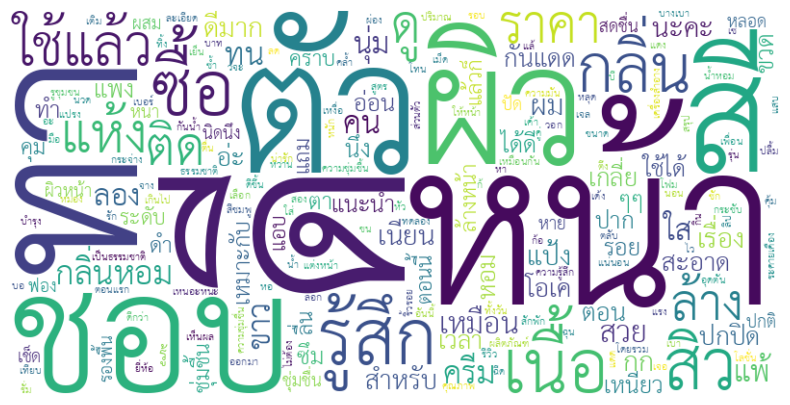

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# รวมคำทั้งหมดในคอลัมน์ 'tokenized_review' เป็น list เดียว
all_tokens = []
for tokenized_review in df['tokenized_review']:
    all_tokens.extend(tokenized_review)

# นับจำนวนคำที่ปรากฏ
token_counts = Counter(all_tokens)  # ใช้ Counter เพื่อให้ง่ายขึ้น

# แสดง 10 คำที่พบบ่อยที่สุดในรูปแบบที่อ่านง่าย
print("10 คำที่พบบ่อยที่สุด:")
print("-" * 30)  # เส้นขีดเพื่อแยก
for i, (word, count) in enumerate(token_counts.most_common(10), start=1):
    print(f"{i}. {word:<6} : {count:,}")  # ใช้ {count:,} เพื่อแสดงตัวเลขด้วยเครื่องหมายจุลภาค
print("-" * 30)  # เส้นขีดปิดท้าย

font_path = 'THSarabunNew.ttf'  # แก้ไขให้แน่ใจว่าที่อยู่ฟอนต์ถูกต้อง

# สร้าง WordCloud โดยใช้ฟอนต์ภาษาไทยและแสดงผลคำแยกกัน
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      font_path=font_path, collocations=False).generate_from_frequencies(token_counts)

# แสดง WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # ปิดแกน
plt.show()


### Word Index

In [ ]:
# สร้างคลังคำจากคอลัมน์ 'tokenized_review'
vocab = set(word for tokens in df['tokenized_review'] for word in tokens)

# สร้างดิกชันนารีสำหรับแต่ละคำและดัชนี โดยเริ่มจาก 1
word_index = {word: i+1 for i, word in enumerate(vocab)}

# ขนาดของคลังคำ (vocabulary size)
vocab_size = len(word_index) + 1  # บวก 1 สำหรับ padding token (ถ้าจำเป็น)

# แสดงผล
print("ขนาดของคลังคำ:", vocab_size)


ขนาดของคลังคำ: 34747


In [ ]:
from collections import Counter
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ตรวจสอบว่าคอลัมน์ 'tokenized_review' มีอยู่ใน DataFrame
if 'tokenized_review' in df.columns:
    # สร้าง Word Index จากคำทั้งหมดในคอลัมน์ 'tokenized_review'
    all_tokens = [word for review in df['tokenized_review'] for word in review]
    word_counts = Counter(all_tokens)
    word_index = {word: i + 1 for i, (word, _) in enumerate(word_counts.most_common())}

    # แปลงคำในแต่ละรีวิวให้เป็นลำดับของตัวเลขโดยใช้ Word Index
    sequences = [[word_index[word] for word in review if word in word_index] for review in df['tokenized_review']]

    # กำหนดความยาวสูงสุด (สามารถปรับได้ตามความเหมาะสม)
    max_length = 100  # หรือเลือกความยาวตามค่าเฉลี่ยหรือรีวิวที่ยาวที่สุด

    # ทำ Padding ให้ทุกลำดับมีความยาวเท่ากับ max_length
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

    # แสดงตัวอย่างลำดับตัวเลขจากรีวิวแรก
    print("ลำดับตัวเลขของรีวิวแรกหลังทำ Padding:", padded_sequences[0])

    # แสดงข้อมูลขนาดของ Word Index และจำนวนรีวิวที่แปลงแล้ว
    print(f"ขนาดของ Word Index: {len(word_index)}")
    print(f"จำนวนรีวิวที่แปลงแล้ว: {len(padded_sequences)}")

else:
    print("คอลัมน์ 'tokenized_review' ไม่มีใน DataFrame")


ลำดับตัวเลขของรีวิวแรกหลังทำ Padding: [1219 2300  489  790   52    3  169  463   89   98  249   20   20   88
    2    3  169  463   69    4    3  489  362    2 1258   11  268 1197
  654  130  171   20   68    2   85   11   94  169  157   85  119  417
  157   21    5  683  841   12  119  568 1112  267   26  918    8   41
    1  438 1029 3724   57   37   21    3   58   11   31   21 2909   11
 2300  489  790  267  126    2    2  122  292   89 2909   11   57   25
   16   15    7   55   26  100 1242   26   37    6   26  187   20  489
 3610 1785]
ขนาดของ Word Index: 34746
จำนวนรีวิวที่แปลงแล้ว: 337184


### Data Split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# แปลงข้อมูล 'padded_sequences' ให้เป็น numpy array หากยังไม่ได้ทำ
padded_sequences = np.array(padded_sequences)

# ตรวจสอบว่าคอลัมน์ 'rate_label' มีอยู่ใน DataFrame และไม่มีค่า NaN
if 'rate_label' in df.columns:
    df = df.dropna(subset=['rate_label'])  # กำจัดค่าที่ว่างออกจาก rate_label

    # แปลง 'rate_label' ให้เป็น numpy array
    rate_labels = np.array(df['rate_label'])

    # ตรวจสอบให้แน่ใจว่าความยาวของข้อมูลและ label ตรงกัน
    if len(padded_sequences) == len(rate_labels):
        # แบ่งข้อมูลออกเป็นชุดฝึกสอนและชุดทดสอบ
        train_data, test_data, train_labels, test_labels = train_test_split(
            padded_sequences, rate_labels, test_size=0.2, random_state=42
        )

        # แสดงจำนวนข้อมูลที่ได้จากการแบ่งชุด
        print("จำนวนข้อมูลชุดฝึกสอน:", len(train_data))
        print("จำนวนข้อมูลชุดทดสอบ:", len(test_data))
    else:
        print("ความยาวของ padded_sequences และ rate_labels ไม่ตรงกัน")
else:
    print("คอลัมน์ 'rate_label' ไม่มีใน DataFrame")


จำนวนข้อมูลชุดฝึกสอน: 269747
จำนวนข้อมูลชุดทดสอบ: 67437


### Word Embedding Model

In [ ]:
import pandas as pd
from gensim.models import Word2Vec

# ตรวจสอบว่า 'tokenized_review' เป็นลิสต์ของลิสต์
if isinstance(df['tokenized_review'][0], list):
    # สร้างโมเดล Word2Vec จากข้อมูลที่ผ่านการทำความสะอาดและแยกคำ
    model = Word2Vec(sentences=df['tokenized_review'], vector_size=100, window=5, min_count=2, workers=4)

    # ตัวอย่างการเข้าถึงเวกเตอร์ของคำ
    word_to_check = 'ดี'  # แทนคำที่ต้องการเช็ค เช่น "ดี"
    try:
        word_vector = model.wv[word_to_check]
        print(f"เวกเตอร์ของคำ '{word_to_check}':\n{word_vector}\n")
    except KeyError:
        print(f"คำ '{word_to_check}' ไม่มีในโมเดล Word2Vec")

    # ค้นหาคำที่คล้ายกัน
    try:
        similar_words = model.wv.most_similar(word_to_check, topn=10)  # 10 คำที่คล้ายกัน
        print(f"คำที่คล้ายกับ '{word_to_check}':")
        for word, similarity in similar_words:
            print(f"{word}: {similarity:.4f}")
    except KeyError:
        print(f"คำ '{word_to_check}' ไม่มีในโมเดล Word2Vec")

    # บันทึกโมเดล
    model_path = "word2vec_model.model"  # ตั้งค่าเส้นทางบันทึกโมเดล
    model.save(model_path)
    print(f"โมเดล Word2Vec ได้ถูกบันทึกที่: {model_path}")

else:
    print("ข้อมูลใน 'tokenized_review' ไม่อยู่ในรูปแบบที่ต้องการ (ลิสต์ของลิสต์)")


เวกเตอร์ของคำ 'ดี':
[-0.539991   -1.7253109   1.5759996   1.483601    0.08284433  0.9232962
  0.258628   -0.13755496  0.06521486  0.26712227  1.2231443   0.31439313
 -0.8095897   0.20552008  0.480984   -1.227836   -1.2594987   1.8550887
  0.13477238  1.9327189  -1.2554662   0.3349386  -0.17426375 -1.5777509
  1.3041455  -0.7613178  -0.5562997   1.2655153   0.79539275 -0.35768375
 -1.6755188   0.16759126 -1.2746997  -0.22687936  0.8377281  -1.5401554
  0.8644227  -0.6192422  -0.13519675  0.54933566  0.3961414   0.68838906
  0.59099865  0.14301518 -2.129384   -0.7982426   2.5111518  -0.14189616
 -0.0338396  -0.3494423  -0.5551704   1.9817736   0.19438232  0.34439275
  0.51629025  0.00880469  0.51816297 -0.5648234   1.0912174   1.1888582
  0.11298043  0.2144813  -2.337065    1.6115757   1.4763469  -1.5916083
 -0.12593795 -1.4621031   1.2349559  -0.7159103   1.167881    0.69353026
 -0.9000493  -0.9884646   0.54933965 -0.14079657  0.03385842 -0.21587531
  0.63074255  0.4391046  -1.014762   

 ### Deep learning model design



In [ ]:
import numpy as np

# ตรวจสอบว่าโมเดล Word2Vec ถูกโหลดไว้ก่อน
if 'model' in globals() and 'cleaned_review' in df.columns:

    # ฟังก์ชันเพื่อสร้างเวกเตอร์จากรีวิว
    def get_vector(review):
        # ตรวจสอบว่า review เป็นข้อความหรือรายการของคำ
        words = review if isinstance(review, list) else review.split()

        # สร้างเวกเตอร์จากคำที่มีในโมเดล Word2Vec
        vector = [model.wv[word] for word in words if word in model.wv]

        # หากมีคำในเวกเตอร์ ให้คืนค่าเวกเตอร์เฉลี่ย
        if vector:
            return np.mean(vector, axis=0)  # คืนค่าเวกเตอร์เฉลี่ย
        else:
            return np.zeros(model.vector_size)  # คืนค่าเวกเตอร์ศูนย์หากไม่มีคำที่ตรง

    # สร้างคอลัมน์ใหม่ 'vector' สำหรับเก็บเวกเตอร์รีวิว
    df['vector'] = df['cleaned_review'].apply(get_vector)

    # แสดงข้อมูลเบื้องต้นของ DataFrame
    print(df[['cleaned_review', 'vector']].head())

else:
    print("โมเดล Word2Vec ยังไม่ได้ถูกโหลดหรือไม่มีคอลัมน์ 'cleaned_review' ใน DataFrame")


                                      cleaned_review  \
0  แนะนำเลยค่ะ เคเอครีมตัวนี้เคยใช้เมื่อหลายปีแล้...   
1  สวัสดีค่ะวันนี้หยิงขอนำเสนอโลชั่นกันแดดตัว เนื...   
2  ครีมกันแดดก็คือสิ่งที่สำคัญที่จะมาเป็นตัวช่วยป...   
3  ได้รับ มาลองใช้ ต้องขอบคุณกิจกรรมจาก ค่ะเนื้อโ...   
4  รีวิวก่อนหน้าลืมโพสต์รูปคร่าจากรูปจะเห็นว่าผิว...   

                                              vector  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.1242367, 0.037728935, 0.885164, -0.49261406...  
2  [0.15366985, -0.23970234, 1.449237, 0.38317993...  
3  [0.4223117, 0.7924592, 0.07563316, -2.404553, ...  
4  [0.25187483, 0.9188039, -1.1132555, -1.5601051...  


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ตรวจสอบคอลัมน์ใน DataFrame
if 'cleaned_review' in df.columns and 'rate_label' in df.columns:

    # แปลงข้อความเป็นรายการของคำ (tokenize)
    sentences = [review.split() for review in df['cleaned_review']]

    # สร้าง Word2Vec Model โดยไม่ใช้ random_state
    model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, seed=42)

    # บันทึกโมเดล
    model.save("word2vec.model")

    # สร้างฟังก์ชันเพื่อแปลงความคิดเห็นเป็นเวกเตอร์
    def get_vector(review):
        words = review.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)  # คำนวณค่าเฉลี่ยของเวกเตอร์
        else:
            return np.zeros(model.vector_size)  # หากไม่มีคำในโมเดล

    # แปลงความคิดเห็นเป็นเวกเตอร์
    X = np.array([get_vector(review) for review in df['cleaned_review']])
    y = df['rate_label'].values  # ใช้คอลัมน์ 'rate_label' เป็นป้ายกำกับ

    # แปลงป้ายกำกับเป็น One-Hot Encoding
    y_encoded = pd.get_dummies(y).values

    # แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # สร้างโมเดล Deep Learning
    model_dl = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(y_encoded.shape[1], activation='softmax')
    ])

    # คอมไพล์โมเดล
    model_dl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # ฝึกโมเดล
    history = model_dl.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # ประเมินโมเดล
    loss, accuracy = model_dl.evaluate(X_test, y_test, verbose=1)
    print(f'Test Accuracy: {accuracy:.2f}')

else:
    print("คอลัมน์ 'cleaned_review' หรือ 'rate_label' ไม่มีใน DataFrame")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7113 - loss: 0.7787 - val_accuracy: 0.7113 - val_loss: 0.7541
Epoch 2/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7137 - loss: 0.7534 - val_accuracy: 0.7113 - val_loss: 0.7522
Epoch 3/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7120 - loss: 0.7543 - val_accuracy: 0.7113 - val_loss: 0.7509
Epoch 4/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7119 - loss: 0.7538 - val_accuracy: 0.7113 - val_loss: 0.7473
Epoch 5/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7122 - loss: 0.7507 - val_accuracy: 0.7113 - val_loss: 0.7485
Epoch 6/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.7114 - loss: 0.7526 - val_accuracy: 0.7113 - val_loss: 0.7484
Epoch 7/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.7130 - loss: 0.7504 - val_accuracy: 0.7113 - val_loss: 0.7467
Epoch 8/10
8430/8430 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.7121 - loss: 0

### Model Training

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# สมมติว่า df คือ DataFrame ที่มีคอลัมน์ 'cleaned_review' และ 'rate_label'
# ตรวจสอบให้แน่ใจว่ามีการแปลงข้อมูล X_train และ y_train
if 'cleaned_review' in df.columns and 'rate_label' in df.columns:
    # สร้างฟังก์ชันเพื่อแปลงความคิดเห็นเป็นเวกเตอร์
    def get_vector(review):
        words = review.split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        if word_vectors:
            return np.mean(word_vectors, axis=0)
        else:
            return np.zeros(model.vector_size)

    # สร้าง DataFrame สำหรับการแยกข้อมูล
    X = np.array([get_vector(review) for review in df['cleaned_review']])
    y = df['rate_label'].values

    # แบ่งข้อมูลออกเป็นชุดฝึกและชุดทดสอบ
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # สเกลข้อมูล
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # สร้างโมเดลการเรียนรู้ของเครื่อง พร้อมเพิ่ม max_iter
    model_lr = LogisticRegression(max_iter=500, solver='liblinear')

    # ฝึกโมเดล
    model_lr.fit(X_train, y_train)

    # ทำนายผลลัพธ์จากชุดทดสอบ
    predictions = model_lr.predict(X_test)

    # สร้าง DataFrame สำหรับผลลัพธ์
    results = pd.DataFrame({
        'Actual': y_test,
        'Predicted': predictions
    })

    # แปลงผลลัพธ์จาก label เป็นข้อความ
    label_mapping = {
        0: "ไม่ชอบ",
        1: "เฉยๆ",
        2: "ชอบ"
    }

    # แปลง label เป็นข้อความ
    results['Actual'] = results['Actual'].map(label_mapping)
    results['Predicted'] = results['Predicted'].map(label_mapping)

    # แสดงผลลัพธ์ในรูปแบบ DataFrame
    print("ผลลัพธ์ที่ทำนายจากชุดทดสอบ:")
    print(results)

    # คำนวณความถูกต้อง
    accuracy = (predictions == y_test).mean()
    print(f'\nความถูกต้องของโมเดล: {accuracy:.2%}')
else:
    print("คอลัมน์ 'cleaned_review' หรือ 'rate_label' ไม่มีใน DataFrame")


ผลลัพธ์ที่ทำนายจากชุดทดสอบ:
      Actual Predicted
0        ชอบ       ชอบ
1       เฉยๆ       ชอบ
2        ชอบ       ชอบ
3        ชอบ       ชอบ
4        ชอบ       ชอบ
...      ...       ...
67432    ชอบ       ชอบ
67433    ชอบ       ชอบ
67434    ชอบ       ชอบ
67435    ชอบ       ชอบ
67436   เฉยๆ       ชอบ

[67437 rows x 2 columns]

ความถูกต้องของโมเดล: 71.16%


### Model Evaluation

1. ใช้โมเดลทำนายผลบนชุดข้อมูลทดสอบ...
ผลการทำนายสำเร็จ! ตัวอย่างผลการทำนาย: [2 2 2 2 2 2 2 2 2 2]

2. สร้าง Confusion Matrix โดยเปรียบเทียบผลจริงและผลการทำนาย...
Confusion Matrix ที่ได้:
[[   42    20  6809]
 [   21    31 12545]
 [   32    21 47916]]

3. แสดง Confusion Matrix เพื่อดูการกระจายของผลการทำนายในแต่ละคลาส:


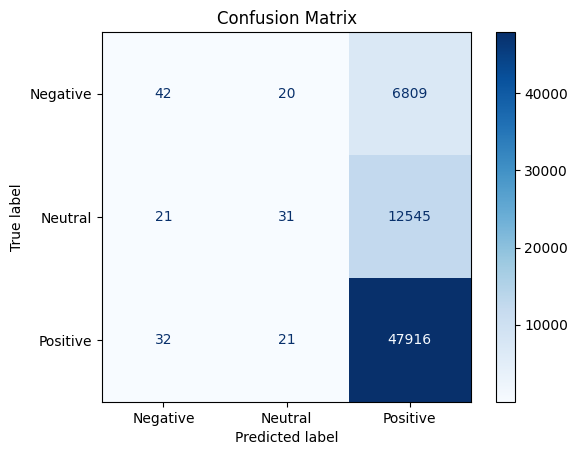


4. สรุปผลการประเมินโมเดลด้วยค่า Precision, Recall, และ F1-Score:
              precision    recall  f1-score   support

    Negative       0.44      0.01      0.01      6871
     Neutral       0.43      0.00      0.00     12597
    Positive       0.71      1.00      0.83     47969

    accuracy                           0.71     67437
   macro avg       0.53      0.34      0.28     67437
weighted avg       0.63      0.71      0.59     67437



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# สมมติว่าคุณมีโมเดลที่ฝึกไว้ชื่อ model_lr สำหรับ Logistic Regression
print("1. ใช้โมเดลทำนายผลบนชุดข้อมูลทดสอบ...")
y_pred = model_lr.predict(X_test)  # ใช้โมเดลที่เหมาะสมที่คุณฝึกไว้
print("ผลการทำนายสำเร็จ! ตัวอย่างผลการทำนาย:", y_pred[:10])

# สร้าง Confusion Matrix
print("\n2. สร้าง Confusion Matrix โดยเปรียบเทียบผลจริงและผลการทำนาย...")
conf_matrix = confusion_matrix(y_test, y_pred)  # ใช้ y_test ตรง ๆ
print("Confusion Matrix ที่ได้:")
print(conf_matrix)

# แสดง Confusion Matrix
print("\n3. แสดง Confusion Matrix เพื่อดูการกระจายของผลการทำนายในแต่ละคลาส:")
# ปรับปรุง display_labels ให้ตรงกับจำนวนคลาสใน Confusion Matrix
labels = ['Negative', 'Neutral', 'Positive']  # ป้ายชื่อที่ใช้
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# คำนวณและแสดง Classification Report
print("\n4. สรุปผลการประเมินโมเดลด้วยค่า Precision, Recall, และ F1-Score:")
report = classification_report(y_test, y_pred, target_names=labels)
print(report)